# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2381 Ахметгареев Карим Ильгизович и Самулевич Степан Александрович. Вариант №1.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения


Дискретное преобразование Фурье:

$X(n) = \sum_{k=0}^{N-1} x_k e^{-i \frac{2 \pi n}{N} k}, \quad n = 0, 1, 2, ..., N - 1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы



### Задание 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
N = 31
n = np.arange(N)
dw = 0.1 * np.pi
t = np.linspace(0, N-1, 1000) 
omegas = np.arange(0, 1.1*np.pi, dw)
A = np.random.randint(1, 12, size=len(omegas))
A = A / np.sum(A)
phi = np.random.rand(len(omegas)) * 0.5

### Задание 2

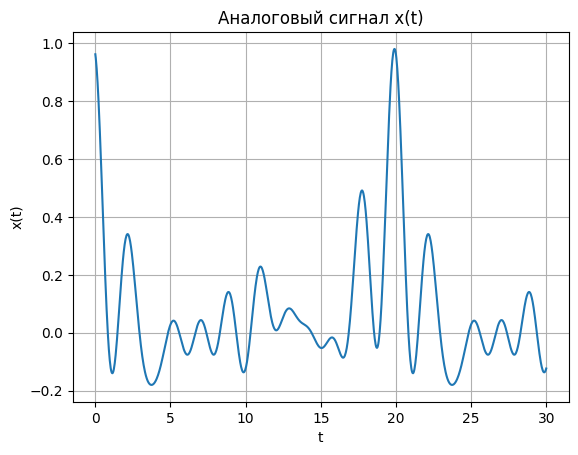

In [6]:
# аналоговый сигнал
x_a = np.zeros_like(t)
for Ak, w, ph in zip(A, omegas, phi):
    x_a += Ak * np.cos(w*t + ph)

plt.figure()
plt.plot(t, x_a)
plt.title("Аналоговый сигнал x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

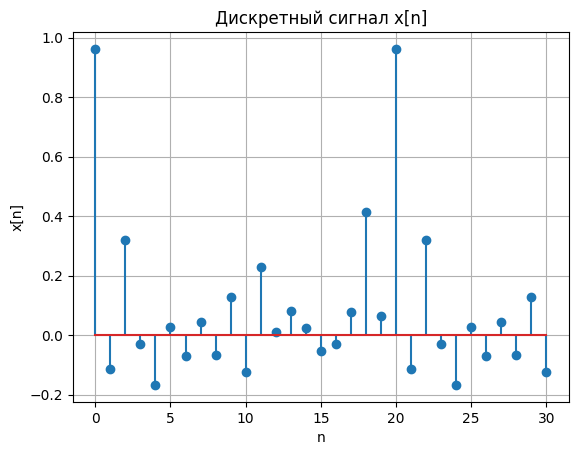

In [5]:
# дискретный сигнал
x = np.zeros(N)
for Ak, w, ph in zip(A, omegas, phi):
    x += Ak * np.cos(w*n + ph)

plt.figure()
plt.stem(n, x)
plt.title("Дискретный сигнал x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()

### Задание 3

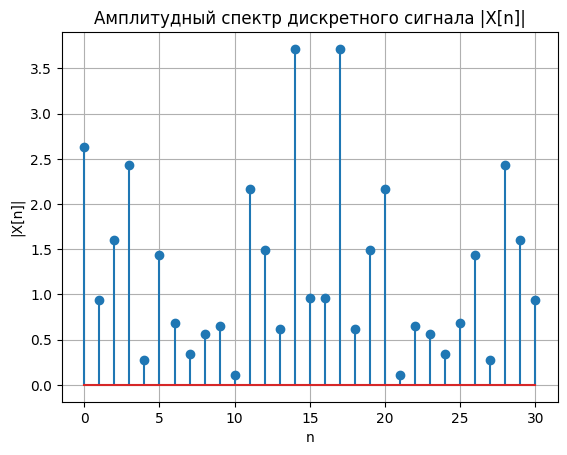

In [12]:
X = np.fft.fft(x)
X_abs = np.abs(X)

plt.figure()
plt.stem(n, X_abs)
plt.title("Амплитудный спектр дискретного сигнала |X[n]|")
plt.xlabel("n")
plt.ylabel("|X[n]|")
plt.grid(True)
plt.show()

### Задание 4

In [22]:
def smooth_poly(x, M):
    h = np.ones(M) / M
    return np.convolve(x, h, mode='same')

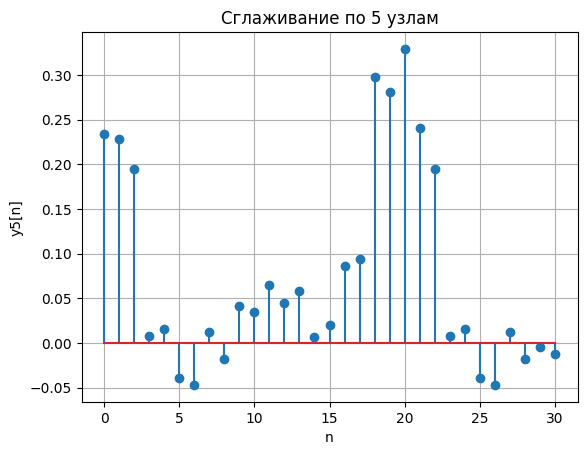

In [ ]:
y5 = smooth_poly(x, 5)
plt.figure()
plt.stem(n, y5)
plt.title("Сглаживание по 5 точкам")
plt.xlabel("n")
plt.ylabel("y5[n]")
plt.grid(True)
plt.show()

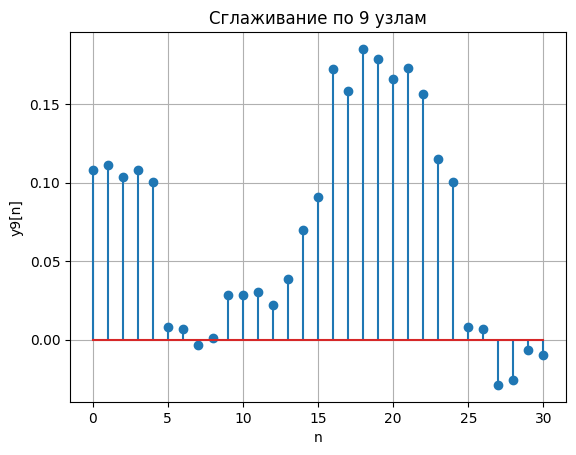

In [ ]:
y9 = smooth_poly(x, 9)

plt.figure()
plt.stem(n, y9)
plt.title("Сглаживание по 9 точкам")
plt.xlabel("n")
plt.ylabel("y9[n]")
plt.grid(True)
plt.show()

Cглаживание по 5 точкам определяется формулой:

$$
y[n] = \frac{1}{5} \sum_{k=n-2}^{n+2} x[k]
= \frac{1}{5}\left(
x[n-2] + x[n-1] + x[n] + x[n+1] + x[n+2]
\right)
$$

Передаточная функция фильтра:

$$
H(\omega) = \frac{1}{5}
\left(
1 + 2\cos \omega + 2\cos 2\omega
\right)
$$

Сглаживание по 9 точкам определяется формулой:

$$
y[n] = \frac{1}{9} \sum_{k=n-4}^{n+4} x[k]
= \frac{1}{9}\left(
x[n-4] + x[n-3] + x[n-2] + x[n-1] + x[n] +
x[n+1] + x[n+2] + x[n+3] + x[n+4]
\right)
$$

Передаточная функция фильтра:

$$
H(\omega) = \frac{1}{9}
\left(
1 + 2\cos \omega + 2\cos 2\omega +
2\cos 3\omega + 2\cos 4\omega
\right)
$$


### Задание 5

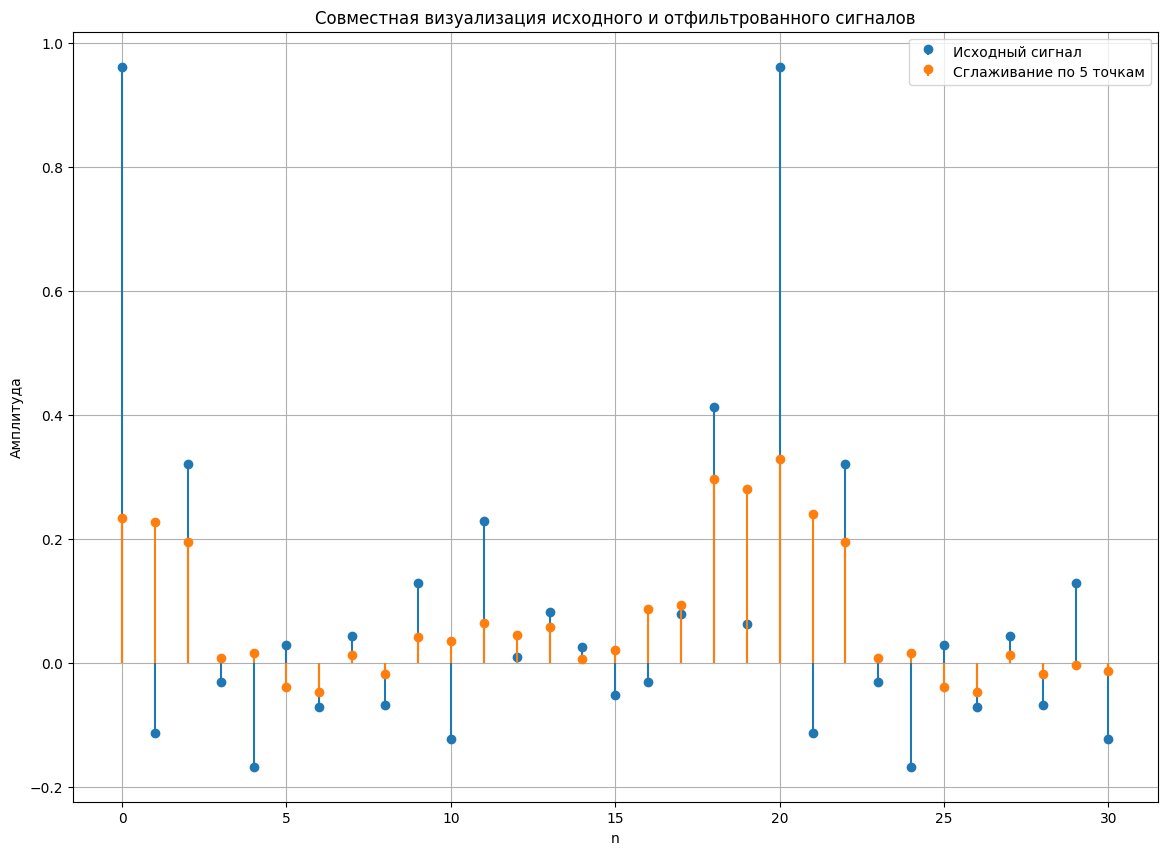

In [40]:
plt.figure()
plt.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Исходный сигнал')
plt.stem(n, y5, linefmt='C1-', markerfmt='C1o', basefmt=' ', label='Сглаживание по 5 точкам')
plt.title("Совместная визуализация исходного и отфильтрованного сигналов")
plt.xlabel("n")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()

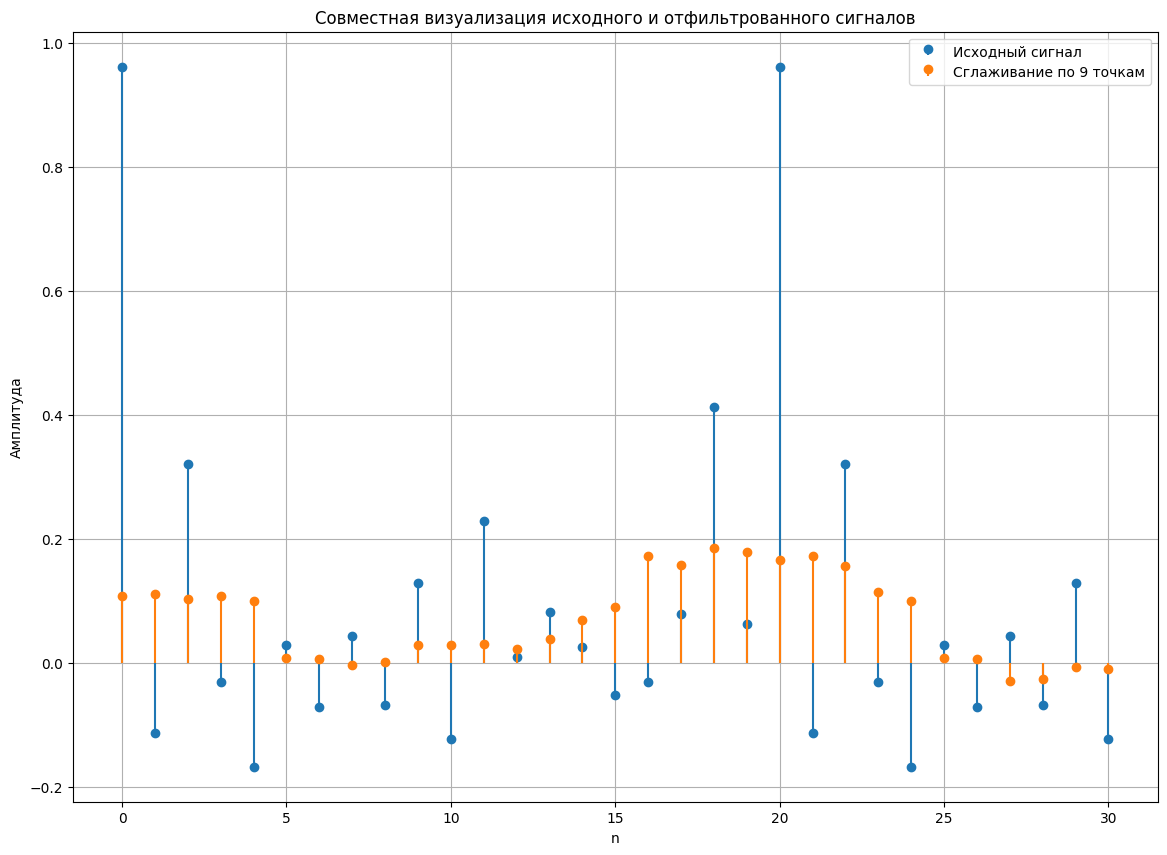

In [39]:
plt.figure()
plt.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Исходный сигнал')
plt.stem(n, y9, linefmt='C1-', markerfmt='C1o', basefmt=' ', label='Сглаживание по 9 точкам')
plt.title("Совместная визуализация исходного и отфильтрованного сигналов")
plt.xlabel("n")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)
plt.show()

### Задание 6

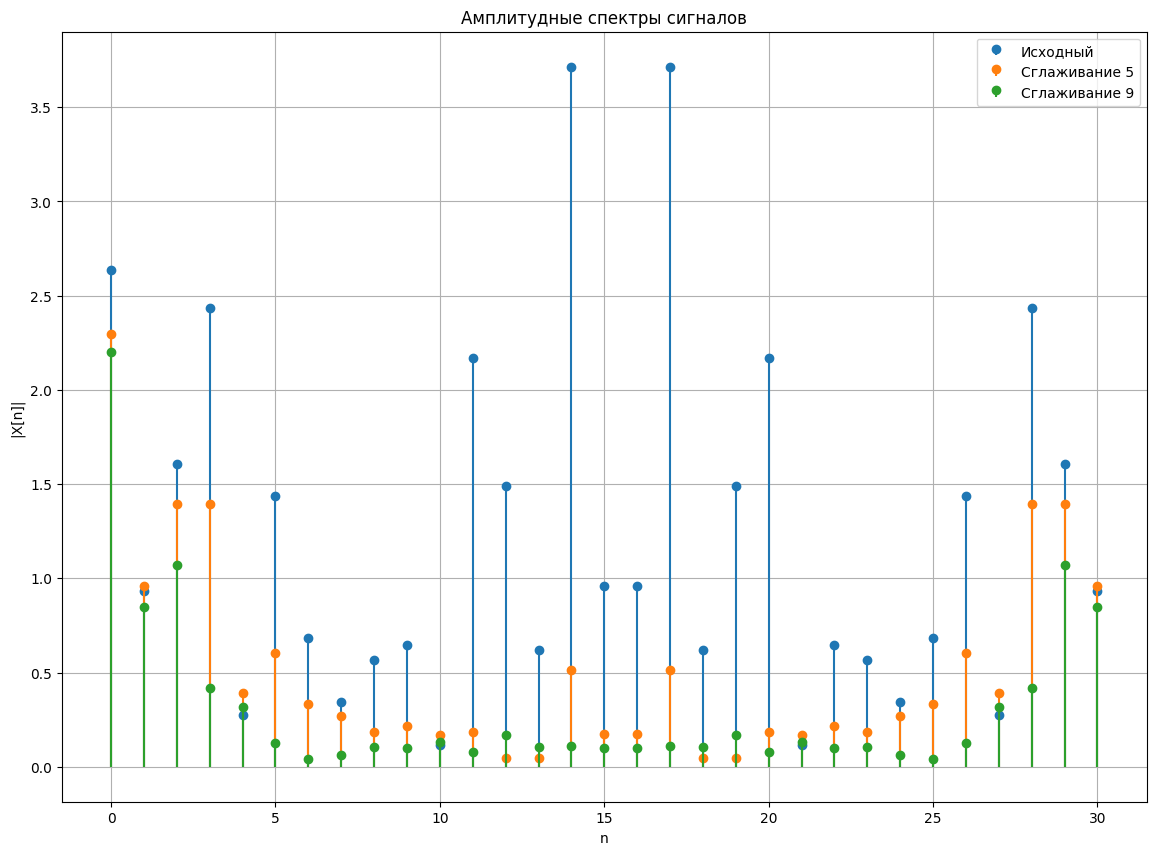

In [51]:
X = np.abs(np.fft.fft(x))
Y5 = np.abs(np.fft.fft(y5))
Y9 = np.abs(np.fft.fft(y9))


plt.figure()
plt.stem(n, X, linefmt='C0', markerfmt='C0o', label='Исходный', basefmt=' ')
plt.stem(n,Y5, linefmt='C1', markerfmt='C1o', label='Сглаживание 5', basefmt=' ')
plt.stem(n,Y9, linefmt='C2', markerfmt='C2o', label='Сглаживание 9', basefmt=' ')
plt.title("Амплитудные спектры сигналов")
plt.xlabel("n")
plt.ylabel("|X[n]|")
plt.legend()
plt.grid(True)
plt.show()

### Задание 7


Сглаживающие фильтры по 5 и 9 точкам являются линейными нерекурсивными
фильтрами нижних частот, что подтверждается аналитическим видом их
передаточных функций:

$$
H_5(\omega) = \frac{1}{5}\left(1 + 2\cos\omega + 2\cos 2\omega\right)
$$

$$
H_9(\omega) = \frac{1}{9}\left(1 + 2\cos\omega + 2\cos 2\omega +
2\cos 3\omega + 2\cos 4\omega\right)
$$

Максимальное значение передаточной функции достигается при
$\omega = 0$, где:

$$
H_5(0) = 1, \quad H_9(0) = 1
$$

что означает отсутствие искажений для постоянной составляющей сигнала.

С увеличением частоты $\omega$ значения $H(\omega)$ уменьшаются,
что приводит к подавлению высокочастотных составляющих сигнала.
Это полностью согласуется с результатами спектрального анализа:
в спектрах отфильтрованных сигналов наблюдается уменьшение амплитуд
на высоких частотах по сравнению с исходным сигналом.

Сглаживание по 9 точкам обладает более выраженным эффектом подавления
высокочастотных составляющих по сравнению со сглаживанием по 5 точкам,
что соответствует более узкой полосе пропускания фильтра
$H_9(\omega)$.

Таким образом, полученные экспериментальные результаты полностью
соответствуют аналитическому виду передаточной функции $H(\omega)$

### Задание 8

In [48]:
def apply_poly_filter_and_plot(signal, kernel, title_filter):
 
    s_filtered = np.convolve(signal, kernel, mode='same')
    X_filt = np.fft.fft(s_filtered)
    X_filt_abs = np.abs(X_filt)
    X_orig_abs = np.abs(np.fft.fft(signal))
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    ax[0].stem(n, signal, linefmt='C0', markerfmt='C0o', label='Исходный', basefmt=' ')
    ax[0].stem(n, s_filtered, linefmt='C1-', markerfmt='C1o', label='Отфильтрованный', basefmt=' ')
    ax[0].set_title(f'Сигнал: {title_filter}')
    ax[0].set_xlabel("n")
    ax[0].set_ylabel("Амплитуда")
    ax[0].legend()
    ax[0].grid(True)
    ax[1].stem(n, X_orig_abs, linefmt='C0', markerfmt='C0o', label='Исходный', basefmt=' ')
    ax[1].stem(n, X_filt_abs, linefmt='C1', markerfmt='C1o', label='После фильтра', basefmt=' ')
    ax[1].set_title(f'Спектр: {title_filter}')
    ax[1].set_xlabel("n")
    ax[1].set_ylabel("|X(n)|")
    ax[1].legend()
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()

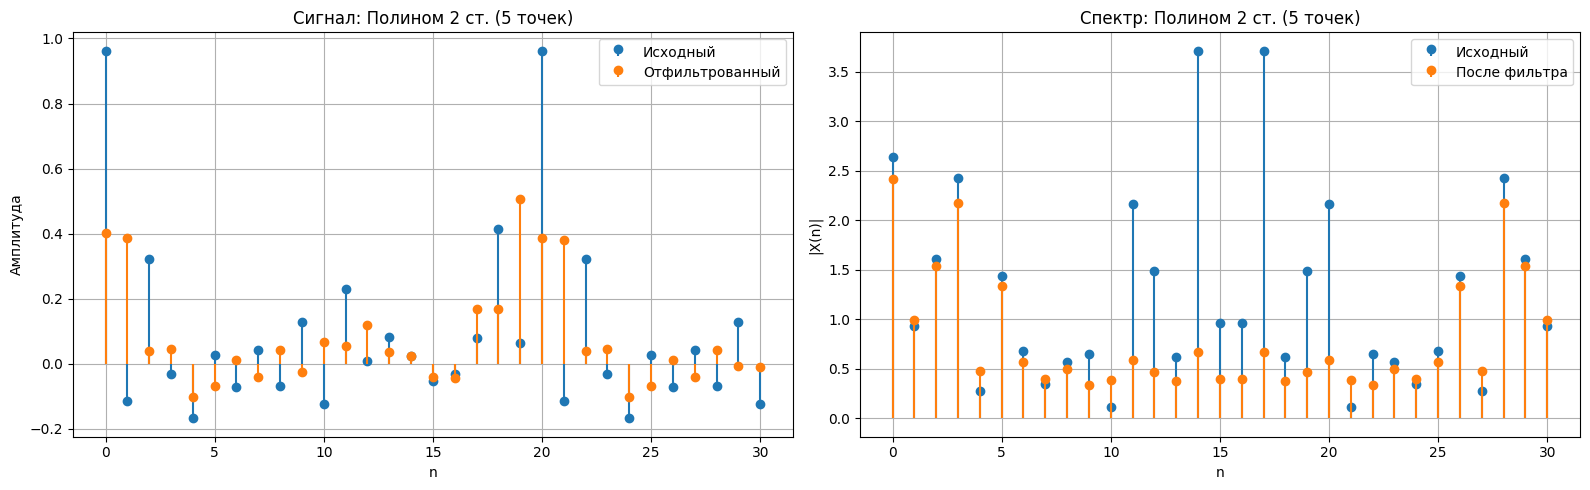

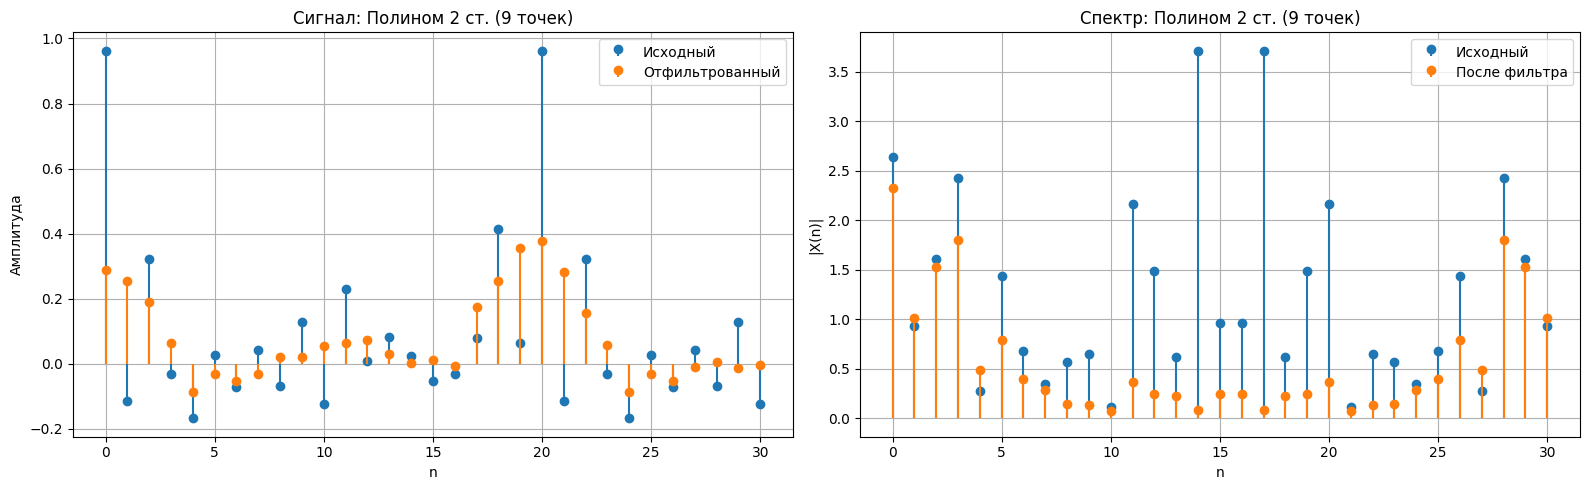

In [49]:
h_poly2_5 = np.array([-3, 12, 17, 12, -3]) / 35.0

h_poly2_9 = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231.0

apply_poly_filter_and_plot(x, h_poly2_5, "Полином 2 ст. (5 точек)")
apply_poly_filter_and_plot(x, h_poly2_9, "Полином 2 ст. (9 точек)")

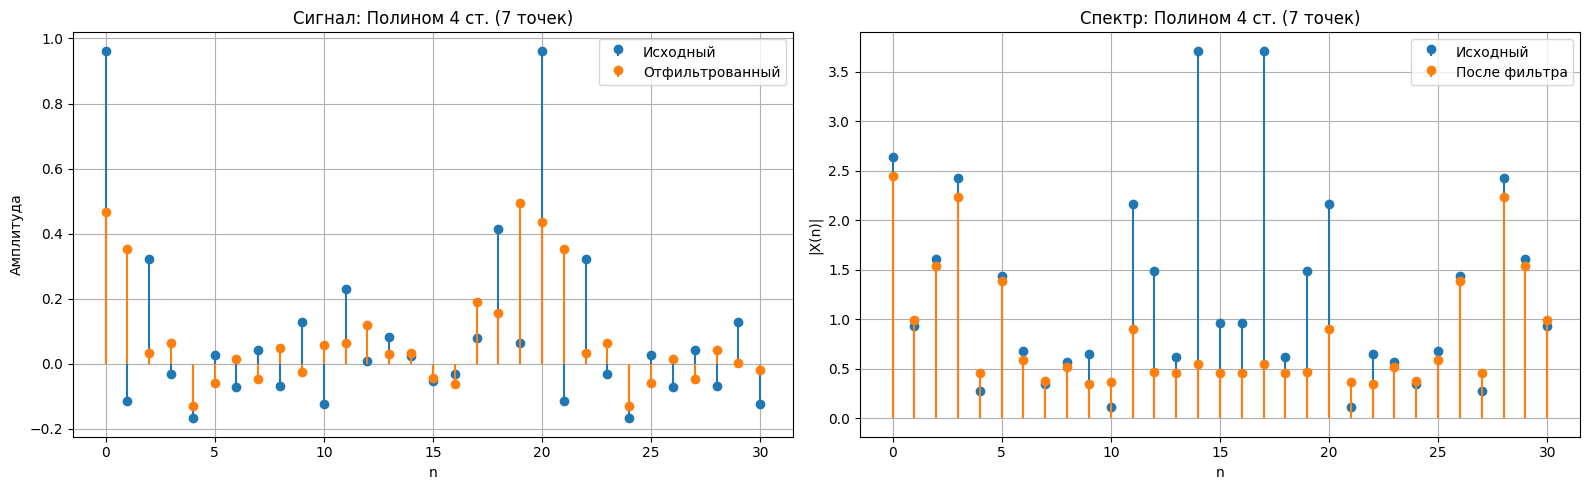

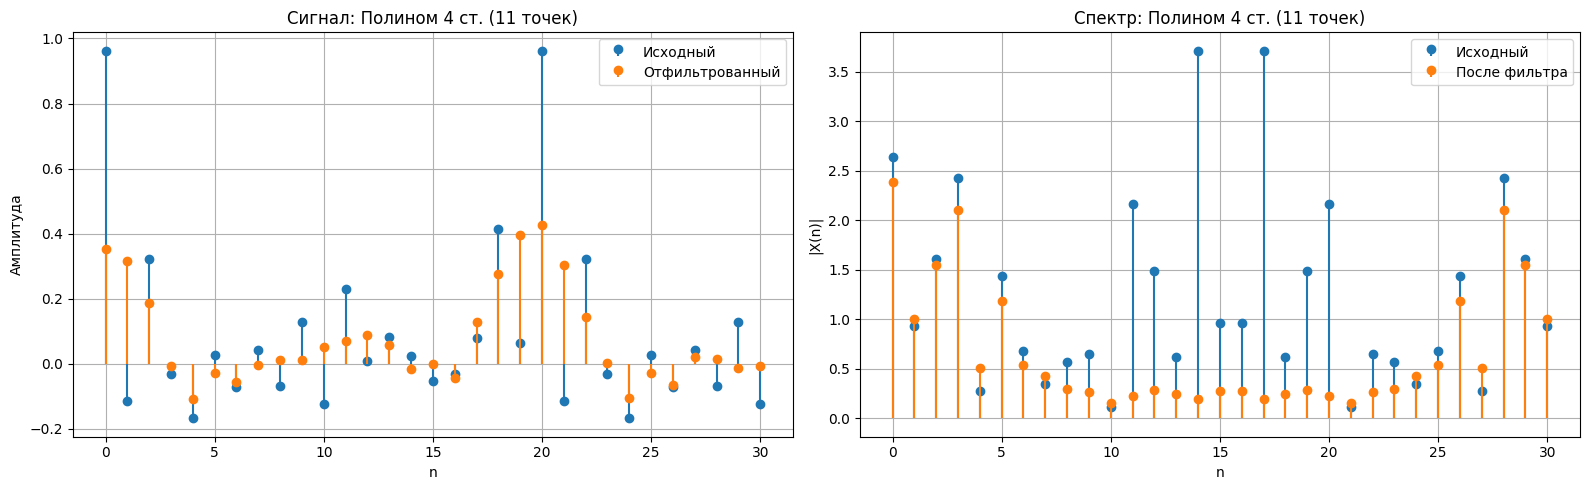

In [53]:
h_poly4_7 = np.array([5, -30, 75, 131, 75, -30, 5]) / 231.0

h_poly4_11 = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429.0

apply_poly_filter_and_plot(x, h_poly4_7, "Полином 4 ст. (7 точек)")
apply_poly_filter_and_plot(x, h_poly4_11, "Полином 4 ст. (11 точек)")

### 8
a)

По 5 точкам ($M=5$):

$$H(\omega) = \frac{1}{35} \left( 17 + 2 \cdot 12 \cos(\omega) - 2 \cdot 3 \cos(2\omega) \right)$$
$$H(\omega) = \frac{1}{35} \left( 17 + 24 \cos(\omega) - 6 \cos(2\omega) \right)$$

По 9 точкам ($M=9$):

$$H(\omega) = \frac{1}{231} \left( 59 + 2 \left( 54 \cos(\omega) + 39 \cos(2\omega) + 14 \cos(3\omega) - 21 \cos(4\omega) \right) \right)$$

b)

По 7 точкам ($M=7$):

$$H(\omega) = \frac{1}{231} \left( 131 + 2 \left( 75 \cos(\omega) - 30 \cos(2\omega) + 5 \cos(3\omega) \right) \right)$$

По 11 точкам ($M=11$):

$$H(\omega) = \frac{1}{429} \left( 143 + 2 \left( 120 \cos(\omega) + 60 \cos(2\omega) - 10 \cos(3\omega) - 45 \cos(4\omega) + 18 \cos(5\omega) \right) \right)$$

Анализ полученных графиков и спектров показывает:

1.  **Полиномы 2-й степени:** По сравнению с линейным сглаживанием (рассмотренным в п. 4-7), фильтр 2-й степени имеет более широкую полосу пропускания. Он лучше сохраняет пики сигнала, но слабее подавляет высокие частоты. При увеличении окна с 5 до 9 точек сглаживание становится сильнее, но полоса пропускания сужается.

2.  **Полиномы 4-й степени:** Эти фильтры еще точнее следуют за формой исходного сигнала (меньше искажают полезный сигнал), так как полином высокой степени может описывать более сложные изгибы. Однако, из-за широкой полосы пропускания, их способность подавлять высокочастотный шум ниже, чем у фильтров младших порядков. Увеличение числа точек (с 7 до 11) приводит к сужению полосы пропускания.

### Выводы  

В ходе работы была проведена фильтрация дискретного сигнала, состоящего из 11 гармоник, различными нерекурсивными фильтрами.

1.  Линейное сглаживание:
    * При использовании окна в 5 точек наблюдается заметное подавление высоких частот в спектре. Форма сигнала становится более плавной, но амплитуда пиков снижается.
    * Увеличение окна до 9 точек приводит к еще более сильному подавлению ВЧ-компонент, однако сигнал начинает терять информативность (сильно размывается), фазовые искажения и искажения на краях становятся существенными.

2.  Полиномиальное сглаживание (степень 2):
    * По сравнению с линейным сглаживанием (при тех же размерах окна), полиномиальный фильтр 2-й степени обладает более широкой полосой пропускания.
    * Это позволяет лучше сохранять амплитуду полезного сигнала и форму локальных экстремумов, но снижает эффективность подавления высокочастотного шума.

3.  Полиномиальное сглаживание (степень 4):
    * Фильтры на основе полиномов 4-й степени (по 7 и 11 точкам) практически не искажают форму основного сигнала на низких и средних частотах.
    * Спектральный анализ показывает, что полоса пропускания таких фильтров очень широка, из-за чего высокочастотные составляющие (которые в данной задаче могут считаться шумом или "дрожанием") подавляются слабо.